In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

# Import the CSV file as a DataFrame
df = pd.read_csv('/home/antoine/gene_pheno_pred/figures/wandb_trialrun.csv')

# Filter to only include ConvKB methods
convkb_df = df[df['method'] == 'ConvKB']

# Create separate DataFrames for each combination of loss function and number of filters
losses = convkb_df['loss_fn'].unique()
filters = convkb_df['n_filters'].unique()
dfs = {}

for loss in losses:
    for filt in filters:
        key = f'{loss}_{filt}'
        dfs[key] = convkb_df[(convkb_df['loss_fn'] == loss) & (convkb_df['n_filters'] == filt)]


In [ ]:
df['loss_fn'] = df['loss_fn'].replace('logistic', 'bce')
df.to_csv('/home/antoine/gene_pheno_pred/figures/wandb_trialrun.csv', index=False)

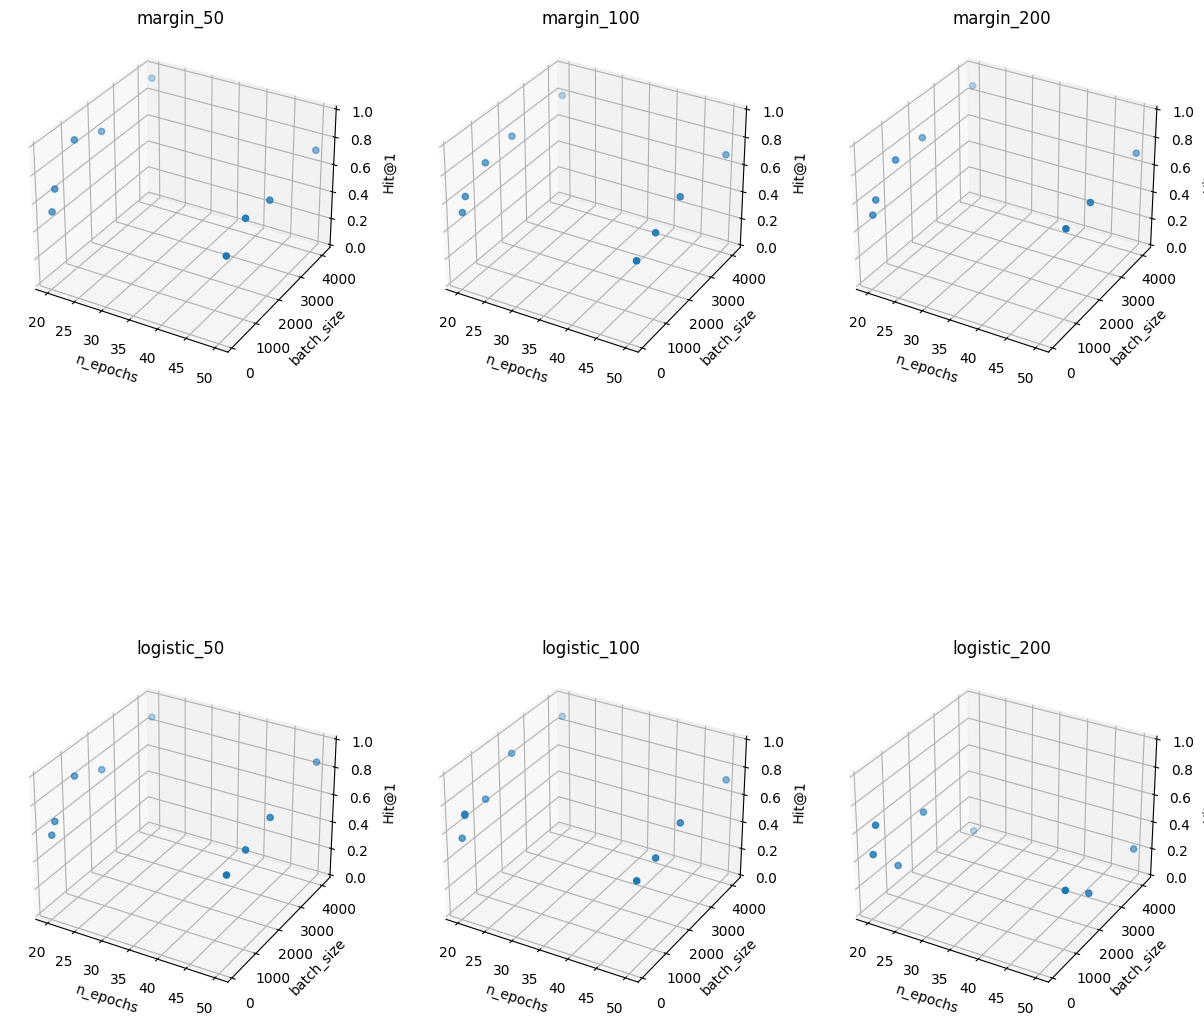

In [5]:
# Set up the figure and axes
fig = plt.figure(figsize=(15, 15))
axes = fig.subplots(nrows=len(losses), ncols=len(filters), subplot_kw={'projection': '3d'})

# Loop over the combinations of loss function and number of filters
for i, loss in enumerate(losses):
    for j, filt in enumerate(filters):
        key = f'{loss}_{filt}'
        data = dfs[key]
        
        # Create the 3D plot
        ax = axes[i, j]

        ax.scatter(data['n_epochs'], data['batch_size'], data['Hit@1'])
        ax.set_xlabel('n_epochs')
        ax.set_ylabel('batch_size')
        ax.set_zlabel('Hit@1')
        ax.set_title(key)

        # Set the axes at scale with each other
        ax.set_zlim3d(0, 1)
# Show the plots
plt.show()


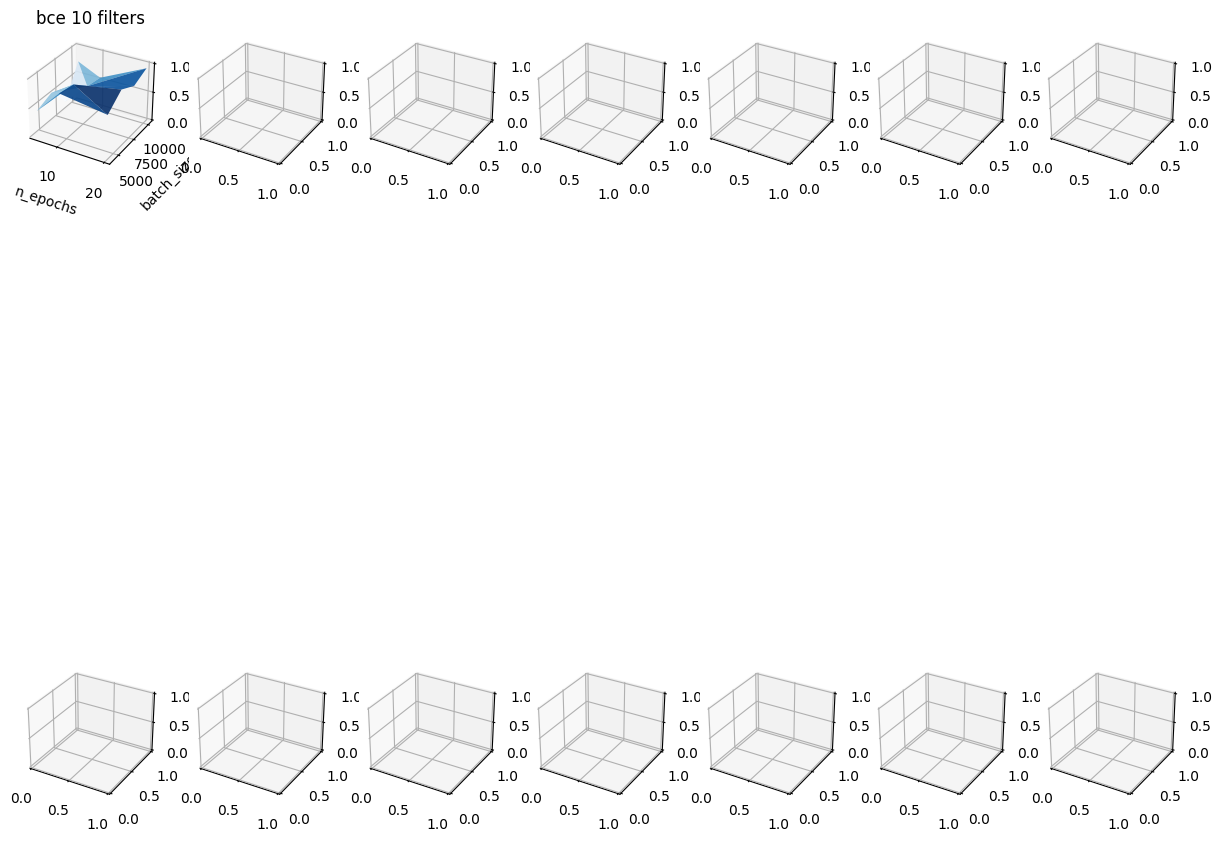

ValueError: x and y arrays must have a length of at least 3

In [4]:
# Set up the figure and axes
fig = plt.figure(figsize=(15, 15))
axes = fig.subplots(nrows=len(losses), ncols=len(filters), subplot_kw={'projection': '3d'})

# Loop over the combinations of loss function and number of filters
for i, loss in enumerate(losses):
    for j, filt in enumerate(filters):
        key = f'{loss}_{filt}'
        data = dfs[key]
        
        # Create the 3D mesh
        ax = axes[i, j]
        ax.plot_trisurf(data['n_epochs'], data['batch_size'], data['Hit@1'], cmap='Blues', alpha=0.9)
        ax.set_xlabel('n_epochs')
        ax.set_ylabel('batch_size')
        ax.set_zlabel('Hit@1')
        ax.set_title(str(key.replace('_', ' ') + ' filters'))


        ax.set_zlim3d(0, 1)
        
        # Show the plots
        plt.show()


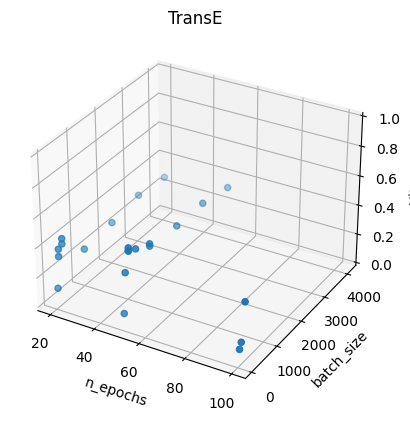

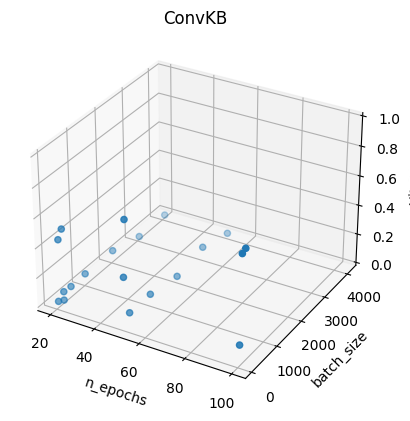

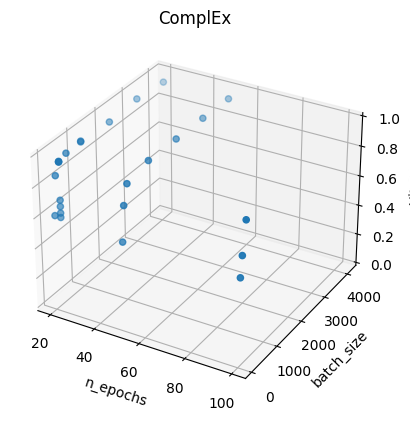

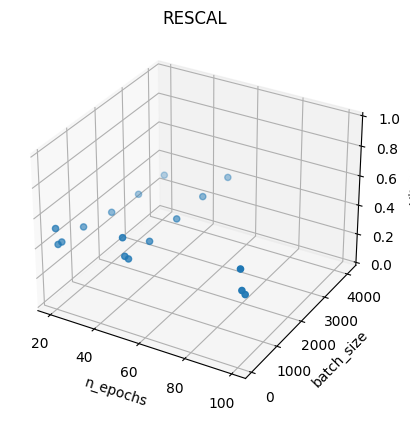

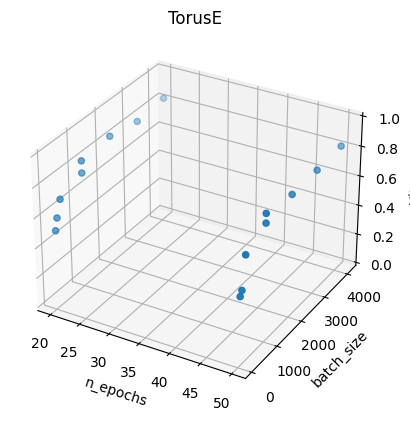

In [18]:
for name in names:
    data = df[df["method"] == name]
    x = data["n_epochs"]
    y = data["batch_size"]
    z = data["Hit@1"]
    # plot the points if there are at least 3 data points
    if len(x) >= 3 and len(y) >= 3 and len(z) >= 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x, y, z, s=20, label=name)

        ax.set_xlabel('n_epochs')
        ax.set_ylabel('batch_size')
        ax.set_zlabel('Hit@1')
        ax.set_title(name)
        
        # fix the scale of the Hit@1 axis to 0 to 1
        ax.set_zlim(0, 1)

        plt.show()


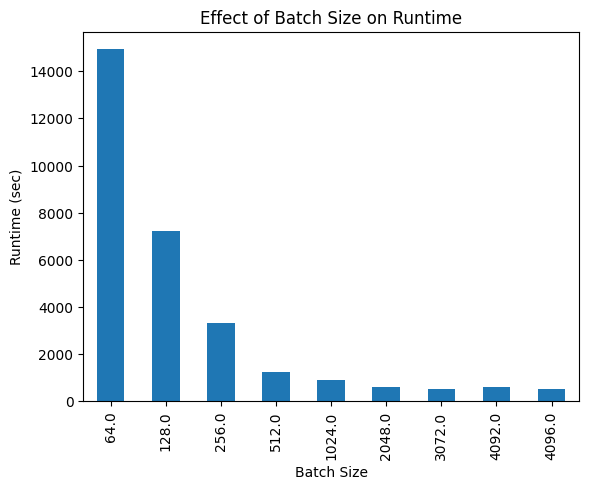

In [19]:
df = pd.read_csv("wandb.csv")
# plot showing how batch size affects runtime
df.groupby('batch_size')['Runtime'].mean().plot(kind='bar')
plt.xlabel('Batch Size')
plt.ylabel('Runtime (sec)')
plt.title('Effect of Batch Size on Runtime')
plt.show()

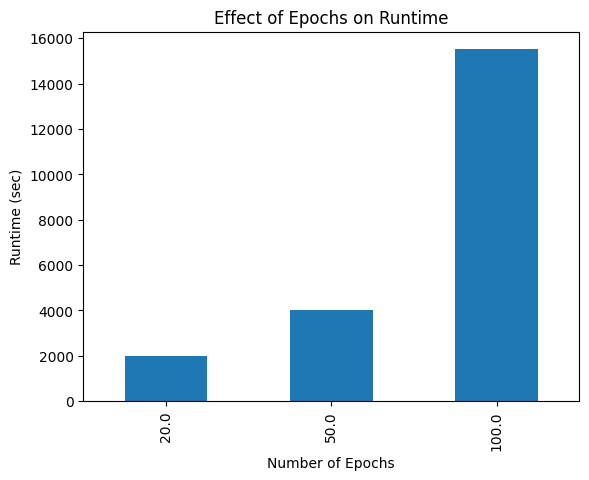

In [20]:
# plot showing how epoch affects runtime
df.groupby('n_epochs')['Runtime'].mean().plot(kind='bar')
plt.xlabel('Number of Epochs')
plt.ylabel('Runtime (sec)')
plt.title('Effect of Epochs on Runtime')
plt.show()


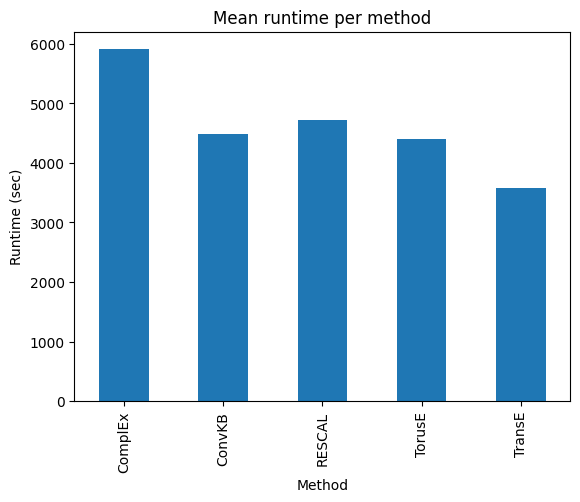

In [21]:
# plot showing the effect of method on runtime
df.groupby('method')['Runtime'].mean().plot(kind='bar')
plt.xlabel('Method')
plt.ylabel('Runtime (sec)')
plt.title('Mean runtime per method')
plt.show()

